In [70]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [71]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer 
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import re

In [89]:
tweets = pd.read_csv('tweets.csv')
tweets.head()

,Date,Tweet,Tweet_processed
0,2012-01-01,Four questions that pushed IBM to stay a step ...,"['four', 'question', 'push', 'ibm', 'stay', 's..."
1,2012-01-04,Today’s Big Blue is ‘Big Open’: http://www.bus...,"['today', 'big', 'blue', 'big', 'open']"
2,2012-01-05,Good Co. Project via IBM Facebook Mid-Market p...,"['good', 'co', 'project', 'via', 'ibm', 'faceb..."
3,2012-01-06,IBM 2011 accessibility articles compiled: http...,"['ibm', 'access', 'articl', 'compil']"
4,2012-01-09,IBM social media animation from the past few y...,"['ibm', 'social', 'medium', 'anim', 'past', 'y..."


In [110]:
def clean_up(s):
    w = re.sub(r'http\S+', ' ', s).replace("IBM", " ").replace("Watson", " ").lower()
    w = re.sub(r"[^a-zA-Z]", " ", w)
    return w

def tokenize(s):
    w = nltk.word_tokenize(s)
    return w   

def stem_and_lemmatize(l):
    ps = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    a = [lemmatizer.lemmatize(ps.stem(w)) for w in l]
    return a

def remove_stopwords(s):
    stop_words = stopwords.words('english')
    w = [x for x in s if x not in stop_words]
    return w

In [111]:
tweets['Tweet_processed'] = tweets.apply(lambda x : clean_up(x['Tweet']), axis = 1)

In [112]:
# selecting a specific period of stock drop and filter
tweets = tweets[(tweets['Date'] > '2015-09-01') & (tweets['Date'] < '2016-02-17')]

In [113]:
words = [w for l in tweets['Tweet_processed'] for w in l]
fdist = FreqDist(words)
fdist

FreqDist({' ': 9475, 'e': 3543, 't': 2635, 'i': 2522, 'a': 2315, 'o': 2285, 'n': 2248, 's': 2079, 'r': 1948, 'h': 1256, ...})

In [114]:
tweets.head()

,Date,Tweet,Tweet_processed
982,2015-09-02,See what's new from @IBM for this year's #USOp...,see what s new from for this year s usopen...
983,2015-09-03,What can your cloud really do? Learn more abou...,what can your cloud really do learn more abou...
984,2015-09-04,See what's new from @IBM for this year's #USOp...,see what s new from for this year s usopen...
985,2015-09-05,".@IBMWatson is helping us all live, work and l...",is helping us all live work and learn be...
986,2015-09-06,What do tennis balls and yellow cabs have in c...,what do tennis balls and yellow cabs have in c...


In [116]:
from PIL import Image
import numpy as np

img = np.array(Image.open('ibm_logo.png'))

In [171]:
wordcloud2 = WordCloud(width=1200, height=600, max_words= 300,color_func=lambda *args, **kwargs: "#132d7d", mode='RGBA', background_color='rgba(255, 255, 255, 0)').generate(''.join(tweets['Tweet_processed']))

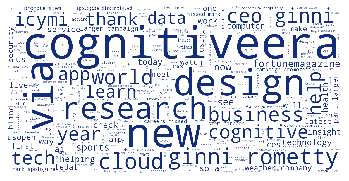

In [172]:
plt.imshow(wordcloud2)# interpolation="bilinear")
plt.axis("off")
#plt.imshow(img, cmap=plt.cm.gray, interpolation='bilinear')
plt.savefig('word_could.jpg', transparent = True, bbox_inches = 'tight', dpi=480)

plt.show()